# League of Legends Matchmaking Notebook
Interim project for the subject of Data Structures in Universidad Anáhuac Querétaro

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
from classes import *
from IPython.display import Image

## Solution Description

### Class Player
Class that represents a League of Legends player. This function contains the statistics for a player and the function to calculate his MMR.

In [20]:
p1 = Player('pinguinodelanasa', 150, 55, 'Bronze', 1, True, 'adc', 'jg')
p2 = Player('Charls Alonso', 146, 50, 'Bronze', 2, False, 'sup', 'top')
p3 = Player('Johiliwisky18', 98, 58, 'Silver', 3, True, 'jg', 'mid')
p4 = Player('nigaalan', 159, 56, 'Gold', 4, True, 'top', 'jg')
p5 = Player('Osiris', 365, 60, 'Gold', 1, True, 'mid', 'adc')
print(p1)


pinguinodelanasa
Bronze 1
Level 150
Win Rate: 55%
Primary lane: adc
Secondary lane: jg


#### MMR
The Matchmaking Ranking is the score which is calculated in order to create a matched game. The class Player includes the method for calculating each player's MMR.

In [21]:
# Method inside the Player class for calculating MMR
def calculate_mmr(self):
    # First, you obtain MMR depending on your division and your rank
    if self.division == 'Iron':
        self.mmr = 200
        if self.rank == 1:
            self.mmr += 400
        elif self.rank == 2:
            self.mmr += 300
        elif self.rank == 3:
            self.mmr += 200
        elif self.rank == 4:
            self.mmr += 100
        self.mmr += (self.mmr*.1) * (self.winrate*.01)
    elif self.division == 'Bronze':
        self.mmr = 800
        if self.rank == 1:
            self.mmr += 160
        elif self.rank == 2:
            self.mmr += 120
        elif self.rank == 3:
            self.mmr += 80
        elif self.rank == 4:
            self.mmr += 40
    elif self.division == 'Silver':
        self.mmr = 1000
        if self.rank == 1:
            self.mmr += 160
        elif self.rank == 2:
            self.mmr += 120
        elif self.rank == 3:
            self.mmr += 80
        elif self.rank == 4:
            self.mmr += 40
    elif self.division == 'Gold':
        self.mmr = 1200
        if self.rank == 1:
            self.mmr += 200
        elif self.rank == 2:
            self.mmr += 150
        elif self.rank == 3:
            self.mmr += 100
        elif self.rank == 4:
            self.mmr += 50
    elif self.division == 'Platinum':
        self.mmr = 1500
        if self.rank == 1:
            self.mmr += 200
        elif self.rank == 2:
            self.mmr += 150
        elif self.rank == 3:
            self.mmr += 100
        elif self.rank == 4:
            self.mmr += 50
    elif self.division == 'Diamond':
        self.mmr = 1800
        if self.rank == 1:
            self.mmr += 240
        elif self.rank == 2:
            self.mmr += 180
        elif self.rank == 3:
            self.mmr += 120
        elif self.rank == 4:
            self.mmr += 60
    elif self.division == 'Master':
        self.mmr = 2200
    elif self.division == 'Grand Master':
        self.mmr = 2400
    elif self.division == 'Challenger':
        self.mmr = 2600
    
    # The MMR you obtain or lose is based on the 20% of your actual MMR 
    
    # You obtain extra MMR if your win rate is 50% or higher
    if self.winrate >= 50:
        # You obtain your win rate times the 20% of your MMR
        self.mmr += (self.mmr*.2) * (self.winrate*.01)
    # In the other side, you lose MMR if your win rate is below 50%
    else:
        # You lose 50% - your win rate times the 20% of your MMR
        self.mmr -= (self.mmr*.2) * ((50 - self.winrate) *.01)

    return self.mmr

### Class Team
Class that represents a team of five players. One of each position: top, jungle, mid, adc and support.

#### Arrays
The five players are stored in an array with the fixed size of 5. The array will not be resized.

In [22]:
class Team:

    def __init__(self, id):
        self.__id = id
        self.__top = None
        self.__jg = None
        self.__mid = None
        self.__adc = None
        self.__sup = None
        self.__avg_mmr = None
        # We define the attribute arr_team with an array of the size of 5
        self.__arr_team = np.array([0,0,0,0,0]) 
    
    @property
    def id(self): 
        return self.__id
    
    @property
    def top(self): 
        return self.__top

    @top.setter 
    def top(self, top):
        self.__top = top
    
    @property
    def jg(self): 
        return self.__jg

    @jg.setter 
    def jg(self, jg):
        self.__jg = jg

    @property
    def mid(self): 
        return self.__mid

    @mid.setter 
    def mid(self, mid):
        self.__mid = mid
    
    @property
    def adc(self): 
        return self.__adc

    @adc.setter 
    def adc(self, adc):
        self.__adc = adc
    
    @property
    def sup(self): 
        return self.__sup

    @sup.setter 
    def sup(self, sup):
        self.__sup = sup
    
    @property
    def avg_mmr(self): 
        return self.__avg_mmr
    
    @avg_mmr.setter 
    def avg_mmr(self, avg_mmr):
        self.__avg_mmr = avg_mmr
    
    @property
    def arr_team(self): 
        return self.__arr_team

    def calculate_avg_mmr(self):
        if self.top and self.jg and self.mid and self.adc and self.sup:
            total_mmr = self.top.mmr + self.jg.mmr + self.mid.mmr + self.adc.mmr + self.sup.mmr
            self.avg_mmr = total_mmr / 5
            return self.avg_mmr
    
    # We store the type Player objects inside the array
    def create_arr_team(self):
        if self.top and self.jg and self.mid and self.adc and self.sup:
            self.arr_team([self.top, self.jg, self.mid, self.adc, self.sup])

    def __str__(self):
        return '\ntop: {}\njg: {}\nmid: {}\nadc: {}\nsup: {}'.format(self.top.user, self.jg.user, self.mid.user, self.adc.user, self.sup.user)

In [23]:
t1 = Team(1)
t2 = Team(2)
t1.top = p4
t1.jg = p3
t1.mid = p5
t1.adc = p1
t1.sup = p2
t2.top = p4
t2.jg = p3
t2.mid = p5
t2.adc = p1
t2.sup = p2
print(t1)


top: nigaalan
jg: Johiliwisky18
mid: Osiris
adc: pinguinodelanasa
sup: Charls Alonso


### Class Match
Class that represents a match between two teams. These are red and blue teams, they should have almost the same MMR average.

In [24]:
m = Match(1, t1, t2)
print(m)


Red Team
Average MMR: 1248.176
top: nigaalan
jg: Johiliwisky18
mid: Osiris
adc: pinguinodelanasa
sup: Charls Alonso

Blue Team
Average MMR: 1248.176
top: nigaalan
jg: Johiliwisky18
mid: Osiris
adc: pinguinodelanasa
sup: Charls Alonso


### Class Link
Class that represents a single link of a linked list.

In [25]:
class Link:
    def __init__(self, value=None):
        self.value = value
        self.next = None

### Class SLinkedList
There are not linked lists in Python, so this abstract class represents a single linked list.

In [26]:
class SLinkedList:
    def __init__(self):
        self.head = None
    
    def insert_end(self, newdata):
        new_link = Link(newdata)
        if self.head is None:
            self.head = new_link
            return
        laste = self.head
        while(laste.next):
            laste = laste.next
        laste.next=new_link

    def remove(self, key):
        head_value = self.head

        if (head_value is not None):
            if (head_value.value == key):
                self.head = head_value.next
                head_value = None
                return

        while (head_value is not None):
            if head_value.value == key:
                break
            prev = head_value
            head_value = head_value.next

        if (head_value == None):
            return

        prev.next = head_value.next
        head_value = None

    def print_list(self):
        printval = self.head
        while printval is not None:
            print (printval.value)
            printval = printval.next

### Class Queue
Class that is the linked list where the players are added to wait for a match. This class inherits from SLinkedList.

In [27]:
q1 = Queue('Silver')
q1.insert_end(p1)
q1.insert_end(p2)
q1.insert_end(p3)
q1.insert_end(p4)
q1.insert_end(p5)
q1.print_list()


pinguinodelanasa
Bronze 1
Level 150
Win Rate: 55%
Primary lane: adc
Secondary lane: jg

Charls Alonso
Bronze 2
Level 146
Win Rate: 50%
Primary lane: sup
Secondary lane: top

Johiliwisky18
Silver 3
Level 98
Win Rate: 58%
Primary lane: jg
Secondary lane: mid

nigaalan
Gold 4
Level 159
Win Rate: 56%
Primary lane: top
Secondary lane: jg

Osiris
Gold 1
Level 365
Win Rate: 60%
Primary lane: mid
Secondary lane: adc


### Generating random players
There is the function for creating random players following the next probability distribution

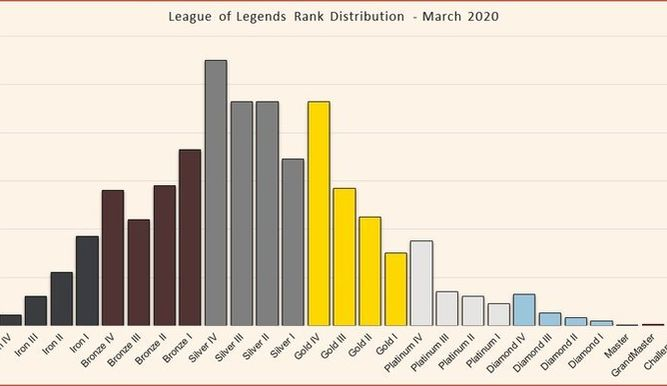

In [28]:
Image("resources/rank_dist.jpg")

In [29]:
# List of possible usernames
users = ['Edgar', 'Pablo', 'Gerardo', 'Diego', 'Mariana', 'Carolina', 'Catherine', 'Gabo', 'Ivan', 'Luisa', 'Nahibi', 'Isabella', 'Brenda']
# List of possible positions
lanes = ['top', 'jg', 'mid', 'adc', 'sup']
# Probability distribution function of the MMR of 100,000 online players 
mmr = 1350 + 320 * np.random.randn(100000)
# Probability distribution function of the Win Rate of 100,000 online players 
wr = 50 + 8 * np.random.randn(100000)

Text(0.5,1,'MMR Distribution of Players Online')

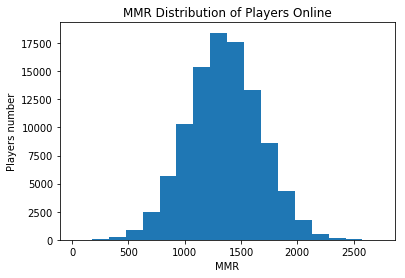

In [30]:
# Showing the histogram of the random generation MMR of online players
k = int(np.ceil(1+np.log2(100000)))
plt.hist(mmr, bins=k)
plt.xlabel('MMR')
plt.ylabel('Players number')
plt.title('MMR Distribution of Players Online')

Text(0.5,1,'Win Rate Distribution of Players Online')

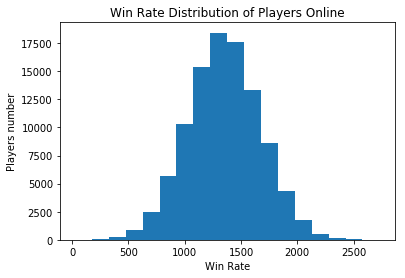

In [31]:
# Showing the histogram of the random generation Win Rate of online players
k = int(np.ceil(1+np.log2(100000)))
plt.hist(mmr, bins=k)
plt.xlabel('Win Rate')
plt.ylabel('Players number')
plt.title('Win Rate Distribution of Players Online')

In [32]:
# Function for generating random players following a normal distribution
def generate_rand_player():
    
    # Selecting a random element of the possible results generated randomly
    rand_mmr = round(np.random.choice(mmr), 2)
    rand_wr = round(np.random.choice(wr), 2)
    rand_rank = random.randint(1,4)
    rand_user = '{}{}{}'.format(np.random.choice(users), random.randint(0,9), random.randint(0,9))
    rand_level = random.randint(30, 550)
    rand_p_lane = np.random.choice(lanes)

    while(True):
        rand_s_lane = np.random.choice(lanes)
        if rand_p_lane != rand_s_lane:
            break
    
    # Creating a player with the choiced statistics based on the selected random MMR 
    if rand_mmr < 800:
        p = Player(rand_user, rand_level, rand_wr, 'Iron', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 800 <= rand_mmr < 1000:
        p = Player(rand_user, rand_level, rand_wr, 'Bronze', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 1000 <= rand_mmr < 1200:
        p = Player(rand_user, rand_level, rand_wr, 'Silver', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 1200 <= rand_mmr < 1500:
        p = Player(rand_user, rand_level, rand_wr, 'Gold', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 1500 <= rand_mmr < 1800:
        p = Player(rand_user, rand_level, rand_wr, 'Platinum', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 1800 <= rand_mmr < 2200:
        p = Player(rand_user, rand_level, rand_wr, 'Diamond', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 2200 <= rand_mmr < 2400:
        p = Player(rand_user, rand_level, rand_wr, 'Master', None, True, rand_p_lane, rand_s_lane)
    elif 2400 <= rand_mmr < 2600:
        p = Player(rand_user, rand_level, rand_wr, 'Grand Master', None, True, rand_p_lane, rand_s_lane)
    elif rand_mmr >= 2600:
        p = Player(rand_user, rand_level, rand_wr, 'Challenger', None, True, rand_p_lane, rand_s_lane)
    return p

In [33]:
# We will create a silver queue for inserting the players that are around the respective MMR
q = Queue('Silver')

# Generate 10,000 random players, the ones whose MMR is around silver will enter to the queue
for i in range(0,10000):
    p = generate_rand_player()
    if 1000 <= p.mmr < 1200:
        q.insert_end(p)

In [34]:
# Create two teams for a match
t1 = Team(1)
t2 = Team(2)

In [35]:
# The method form_team() takes the players in the queue based on the positions left for creating a team
q.form_team(t1)
q.form_team(t2)

In [36]:
# Finally, we create a match with the teams already formed
m = Match(1, t1, t2)
m.print_match_stats()
print(m)

Red Team

Luisa35
Silver 3
Level 433
Win Rate: 36.95%
Primary lane: top
Secondary lane: sup

Gerardo83
Silver 1
Level 324
Win Rate: 41.93%
Primary lane: mid
Secondary lane: sup

Pablo08
Silver 4
Level 173
Win Rate: 40.83%
Primary lane: jg
Secondary lane: mid

Luisa68
Silver 4
Level 43
Win Rate: 43.48%
Primary lane: adc
Secondary lane: sup

Gabo76
Silver 4
Level 343
Win Rate: 38.97%
Primary lane: sup
Secondary lane: adc

Blue Team

Gabo28
Silver 1
Level 414
Win Rate: 42.02%
Primary lane: top
Secondary lane: mid

Ivan98
Bronze 1
Level 172
Win Rate: 51.95%
Primary lane: mid
Secondary lane: jg

Mariana79
Silver 3
Level 384
Win Rate: 38.85%
Primary lane: jg
Secondary lane: sup

Diego16
Silver 4
Level 118
Win Rate: 46.1%
Primary lane: adc
Secondary lane: top

Isabella04
Silver 3
Level 445
Win Rate: 49.93%
Primary lane: sup
Secondary lane: jg


Red Team
Average MMR: 1051.5023999999999
top: Luisa35
jg: Pablo08
mid: Gerardo83
adc: Luisa68
sup: Gabo76

Blue Team
Average MMR: 1073.7766399999998
t

We can see the matchmaking for a silver ranked solo duo game! 